## Why people vote


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm


## `1.` Load and Read the dataset

In [2]:
# Read the data and show a small part of the dataframe to get an understaning of what is in there
url = 'https://courses.edx.org/assets/courseware/v1/56161c22ffa80cfc8637334891d6d402/asset-v1:MITx+15.071x+2T2020+type@asset+block/gerber.csv'
vote = pd.read_csv(url, encoding="ISO-8859-1")
vote.head()

,sex,yob,voting,hawthorne,civicduty,neighbors,self,control
0,0,1941,0,0,1,0,0,0
1,1,1947,0,0,1,0,0,0
2,1,1982,1,1,0,0,0,0
3,1,1950,1,1,0,0,0,0
4,0,1951,1,1,0,0,0,0


"Civic Duty" (variable civicduty) group members were sent a letter that simply said "DO YOUR CIVIC DUTY - VOTE!"

"Hawthorne Effect" (variable hawthorne) group members were sent a letter that had the "Civic Duty" message plus the additional message "YOU ARE BEING STUDIED" and they were informed that their voting behavior would be examined by means of public records.

"Self" (variable self) group members received the "Civic Duty" message as well as the recent voting record of everyone in that household and a message stating that another message would be sent after the election with updated records.

"Neighbors" (variable neighbors) group members were given the same message as that for the "Self" group, except the message not only had the household voting records but also that of neighbors - maximizing social pressure.

"Control" (variable control) group members were not sent anything, and represented the typical voting situation.

In [3]:
vote.shape[0]

344084

In [4]:
vote.describe()

,sex,yob,voting,hawthorne,civicduty,neighbors,self,control
count,344084.000000,344084.000000,344084.000000,344084.000000,344084.000000,344084.000000,344084.000000,344084.000000
mean,0.499282,1956.213654,0.315900,0.111031,0.111072,0.111022,0.111072,0.555803
std,0.500000,14.449093,0.464874,0.314171,0.314221,0.314160,0.314221,0.496877
min,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1956.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1965.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1986.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
vote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344084 entries, 0 to 344083
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   sex        344084 non-null  int64
 1   yob        344084 non-null  int64
 2   voting     344084 non-null  int64
 3   hawthorne  344084 non-null  int64
 4   civicduty  344084 non-null  int64
 5   neighbors  344084 non-null  int64
 6   self       344084 non-null  int64
 7   control    344084 non-null  int64
dtypes: int64(8)
memory usage: 21.0 MB


In [6]:
vote.isnull().sum().sort_values().tail(6)

voting       0
hawthorne    0
civicduty    0
neighbors    0
self         0
control      0
dtype: int64

In [7]:
# portion of people voted in the dataset

## the baseline accuracy 
print('baseline accuracy')
print(vote['voting'].value_counts()/(vote.shape[0]))
print('______________________________________')
print('no voting percentage :',(vote['voting'].value_counts()/(vote.shape[0]))[0])

baseline accuracy
0    0.6841
1    0.3159
Name: voting, dtype: float64
______________________________________
no voting percentage : 0.6841003940898153


In [8]:
## the portion of people voted in the four treatement group (tg) 
tg = ['civicduty','hawthorne', 'self', 'neighbors']
total_obs = vote.shape[0]
for t in tg:
    number_voted = vote[vote[t]==1]
    number_voted_tg = number_voted['voting'].value_counts()
    portion_voted = number_voted_tg/total_obs
    print(t)
    print(portion_voted)
    print('__________________________')

civicduty
0    0.076135
1    0.034936
Name: voting, dtype: float64
__________________________
hawthorne
0    0.075237
1    0.035794
Name: voting, dtype: float64
__________________________
self
0    0.072735
1    0.038337
Name: voting, dtype: float64
__________________________
neighbors
0    0.069062
1    0.041961
Name: voting, dtype: float64
__________________________


## `2.` Understand Correaltions between variables

**Pairplots**

In [ ]:
x = vote.columns
x = list(x)
print(x)

In [38]:
## construct pairplots 

g = sns.pairplot(vote[x], plot_kws={'alpha': 0.7, 'edgecolor': 'blue'})
fig = g.fig;

Error in callback <function flush_figures at 0x0000017F059C6C80> (for post_execute):


KeyboardInterrupt: 

**Corelation heatmap**

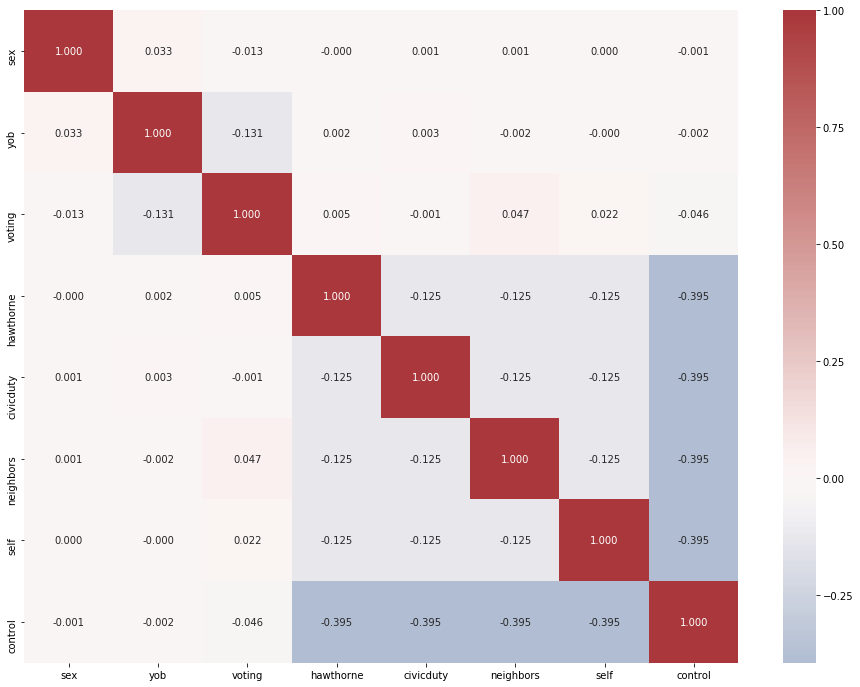

In [39]:
# correlation plot
plt.figure(figsize = [16, 12])
sns.heatmap(vote[x].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag', center = 0)
plt.show()

## `3.` Logistic regression model 
#### We want to predict 0 or 1 (True or False)

In [9]:
## create a logistic regression model using the 4 treatment groups 
#and check for significance of the variables 

In [10]:
# apply logistic regression model 
vote['intercept'] = 1
logm = sm.Logit(vote['voting'],vote[['intercept', 'hawthorne', 
                                     'civicduty', 'neighbors', 'self']])
result = logm.fit()

Optimization terminated successfully.
         Current function value: 0.622071
         Iterations 5


In [11]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 voting   No. Observations:               344084
Model:                          Logit   Df Residuals:                   344079
Method:                           MLE   Df Model:                            4
Date:                Sat, 17 Oct 2020   Pseudo R-squ.:                0.002675
Time:                        10:39:25   Log-Likelihood:            -2.1404e+05
converged:                       True   LL-Null:                   -2.1462e+05
Covariance Type:            nonrobust   LLR p-value:                2.547e-247
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.8634      0.005   -172.459      0.000      -0.873      -0.854
hawthorne      0.1205      0.012     10.009      0.000       0.097       0.144
civicduty      0.0844      0.012      6.972      0.000       0.061       0.108
neighbors      0.3651      0.012     31.260      0.000       0.342       0.388
self           0.2229      0.012     18.786      0.000       0.200       0.246
==============================================================================
"""

All the vairables are of statistical significance to the model 

In [12]:
## Using Sklearn to construct th model and get metrics
from sklearn.linear_model import LogisticRegression


x_train = vote[['hawthorne', 'civicduty', 'neighbors', 'self']]
y_train = vote['voting']

## apply prediction on the traing data 

x_test = x_train

# C=1e10 to avoid regularization
model = LogisticRegression(solver='liblinear', penalty="l2", C=1e10).fit(x_train, y_train)
predicted = model.predict_proba(x_test)

y_pred = (predicted[:,1]>=0.3).astype(int)
#y_pred = model.predict(X_test)

# confusion matrix
confusion = pd.crosstab(y_pred, y_train, rownames=['y_pred'], colnames=['y_train'])
print(confusion)



y_train       0      1
y_pred                
0        134513  56730
1        100875  51966


In [13]:
confusion.iloc[0,1]

56730

In [14]:
## define the cinfusion matrix parameters 
tn = confusion.iloc[0,0]
tp = confusion.iloc[1,1]
fp = confusion.iloc[0,1]
fn = confusion.iloc[1,0]
sensetivity = tp/(tp+fn)
specifity = tn/(tn+fp)
print('sensetivity :', sensetivity)
print('specifity :', specifity)

sensetivity : 0.3400003925648223
specifity : 0.7033616916697605


In [15]:
## the mode accuracy 
## note that we applied prediction on the training set 
#y_train = y_test
(y_pred == y_train).sum()/len(y_pred)
#model.score(X_test, y_test)


0.5419577777519443

***`The model accuracy can be found using the cnfusion matrix results by getting the total number of tp + tn and deviding that by the total number of datapoints (tp+tn+fp+fn).`***

In [16]:
(y_pred == y_train).sum()/len(y_pred)
#model.score(X_test, y_test)

0.5419577777519443

***Change the threshold of the model to 0.5***

In [17]:
# C=1e10 to avoid regularization
model = LogisticRegression(solver='liblinear', penalty="l2", C=1e10).fit(x_train, y_train)
predicted = model.predict_proba(x_test)

y_pred = (predicted[:,1]>=0.5).astype(int)
#y_pred = model.predict(X_test)

# confusion matrix
pd.crosstab(y_pred, y_train, rownames=['y_pred'], colnames=['y_train'])

y_train,0,1
y_pred,,
0,235388,108696


In [18]:
## the mode accuracy 
## note that we applied prediction on the training set 
#y_train = y_test
(y_pred == y_train).sum()/len(y_pred)
#model.score(X_test, y_test)

0.6841003940898153

***AUC calcualtion*** 

In [19]:
from sklearn.metrics import roc_auc_score
y_test = y_train # beccasue we did predict over the training data after mode construciton 
roc_auc_score(y_test, y_pred)

0.5

Even though all of our **variables are significant, our model does not improve over the baseline model of just predicting that someone will not vote**, and the AUC is low. So while the treatment groups do make a difference, this is a weak predictive model.

# Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

vote_decision_tree = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 

In [21]:
dtresult = vote_decision_tree.fit(x_train, y_train)

In [22]:
## visualising a tree or its text 
#https://mljar.com/blog/visualize-decision-tree/#:~:text=Visualize%20a%20Decision%20Tree%20in%204%20Ways%20with%20Scikit%2DLearn%20and%20Python,-June%2022%2C%202020&text=A%20Decision%20Tree%20is%20a,presented%20in%20the%20tree%20leaves.

***Text presentation of the decision tree***

In [23]:
from sklearn import export_text

ImportError: cannot import name 'export_text' from 'sklearn' (C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\sklearn\__init__.py)

In [24]:
r = export_text(vote_decision_tree)

NameError: name 'export_text' is not defined

In [31]:
tree(vote_decision_tree)

NameError: name 'tree' is not defined

In [24]:
## plot the decision tree in python 

import graphviz
# DOT data
dot_data = tree.export_graphviz(dtresult, out_file=None, 
                                feature_names=vote.feature_names,  
                                class_names=vote.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

ModuleNotFoundError: No module named 'graphviz'

In [27]:
import sys
!{sys.executable} -m pip install tree

'C:\Users\Mustafa' is not recognized as an internal or external command,
operable program or batch file.


In [28]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Mustafa' is not recognized as an internal or external command,
operable program or batch file.
